# Predicting Listing Gains in The Indian IPO market

In this project I will be using neural networks in TensorFlow to predict listing gains in the Indian IPO market. I will be building a deep learning classification model to determine if there will be listing gains for the IPO. The dataset comes from MoneyControl.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('Indian_IPO_Market_Data.csv')
data.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [3]:
data.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [4]:
data.shape

(319, 9)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB
None


In [6]:
print(data.isnull().sum())

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64


In [7]:
print(data['Listing_Gains_Percent'].describe())

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64


In [8]:
print(data.describe(include='all'))

           Date         IPOName    Issue_Size  Subscription_QIB  \
count        319            319    319.000000        319.000000   
unique       287            319           NaN               NaN   
top     16/08/21  Infinite Comp           NaN               NaN   
freq           4              1           NaN               NaN   
mean         NaN            NaN   1192.859969         25.684138   
std          NaN            NaN   2384.643786         40.716782   
min          NaN            NaN      0.000000          0.000000   
25%          NaN            NaN    169.005000          1.150000   
50%          NaN            NaN    496.250000          4.940000   
75%          NaN            NaN   1100.000000         34.635000   
max          NaN            NaN  21000.000000        215.450000   

        Subscription_HNI  Subscription_RII  Subscription_Total  Issue_Price  \
count         319.000000        319.000000          319.000000   319.000000   
unique               NaN             

The listing_gains_percent column is continous but we want to create a categorical variable called listing_gains_profit that returns 1 when percent is postitive otherwise 0.

In [9]:
data['Listing_Gains_profit'] = data['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)
data['Listing_Gains_profit'].value_counts(normalize=True)

,proportion
Listing_Gains_profit,
1,0.545455
0,0.454545


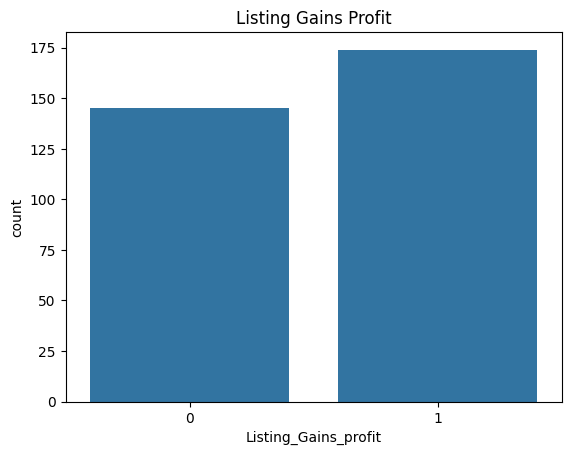

In [10]:
sns.countplot(data=data, x='Listing_Gains_profit')
plt.title('Listing Gains Profit')
plt.show()

Let's build a heatmap to see the correlation with Listing_gains_profit

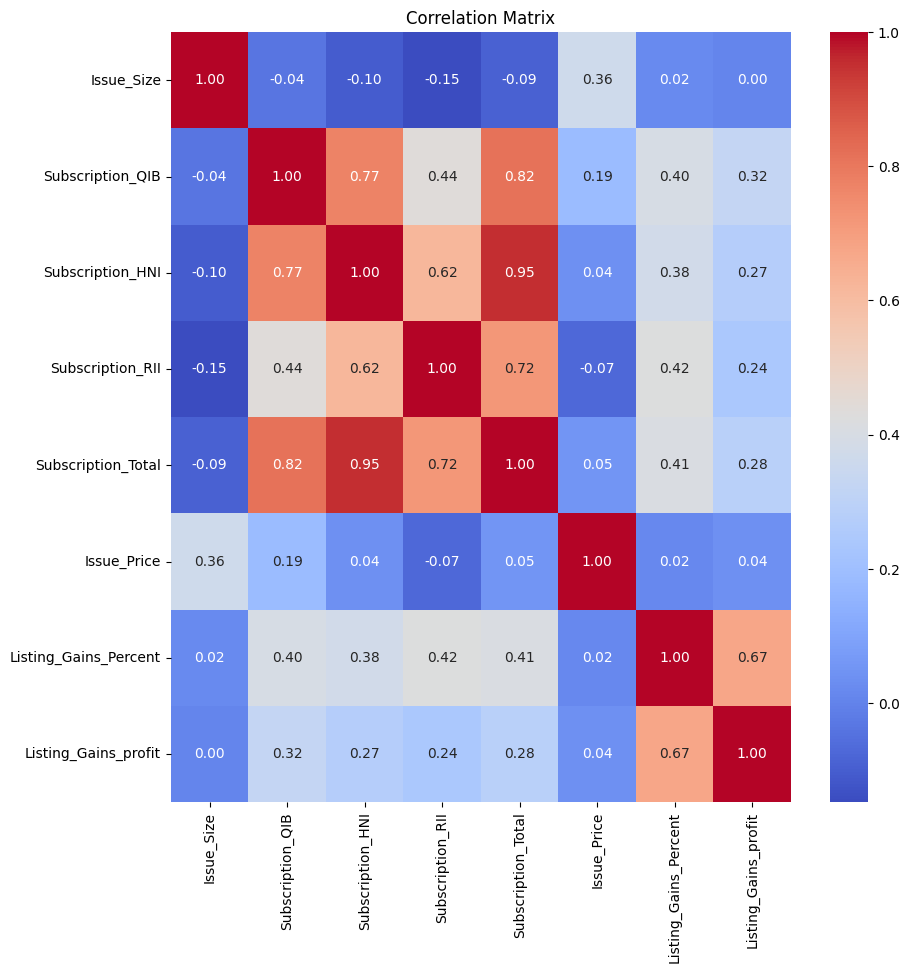

In [11]:
data1 = data.drop(['Date ','IPOName'], axis=1).copy()
corr_matrix = data1.corr()
corr_matrix['Listing_Gains_profit'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

We can see that Subscription_QIB, Subscription_HNI, Subscription_RII and Subscription_total seem to have the greatest effect on Listing_Gains_profit (leaving out listing gains percent because we used that column to make listing_gains_profit). We will use these four predictor variables to train our model on.

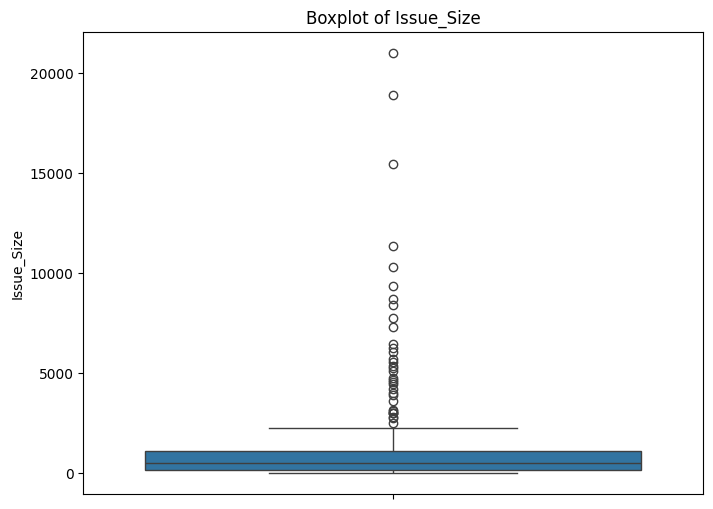

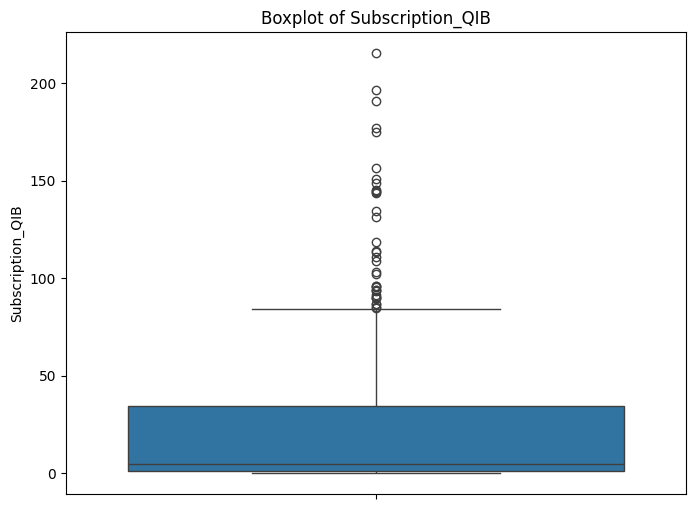

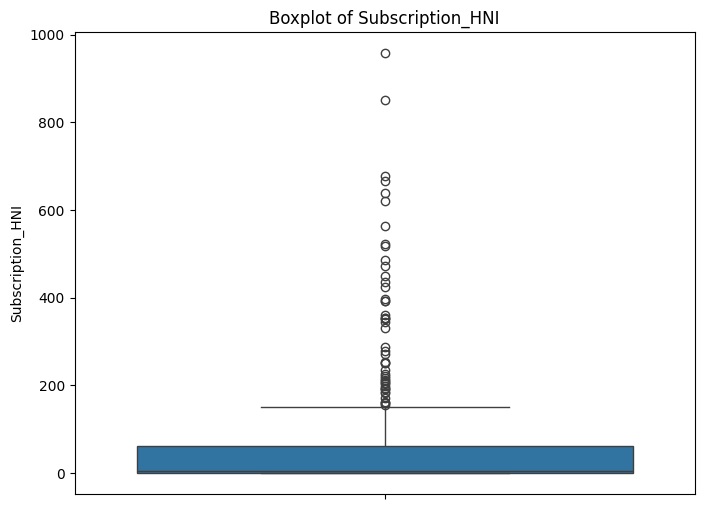

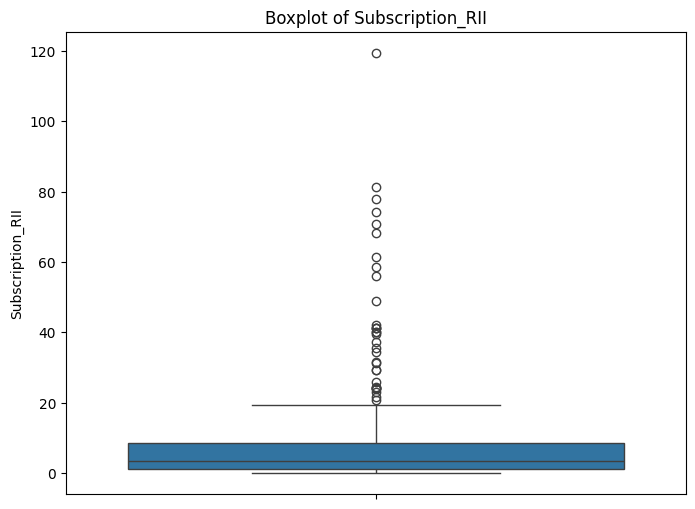

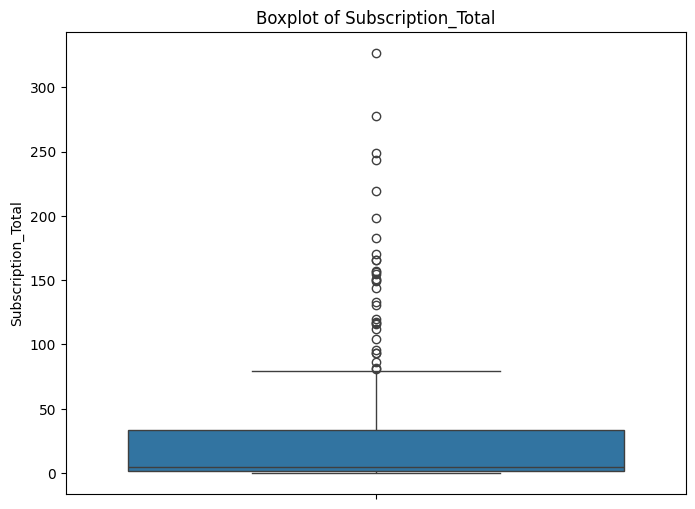

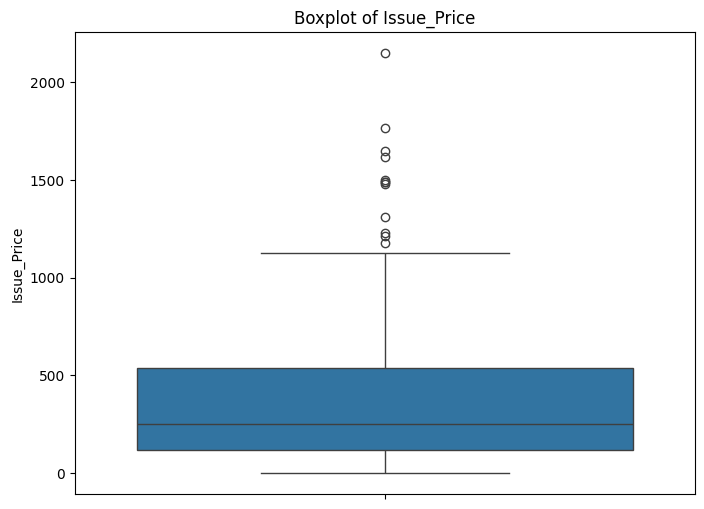

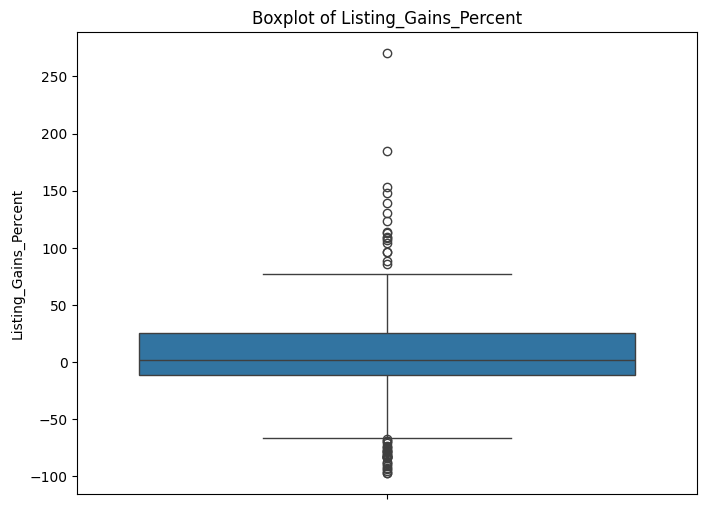

In [12]:
numerical_features = data.select_dtypes(include=['number']).drop(columns=['Listing_Gains_profit'], errors='ignore')

for feature in numerical_features.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

Let's visualize the relationship between the predictors and target column.

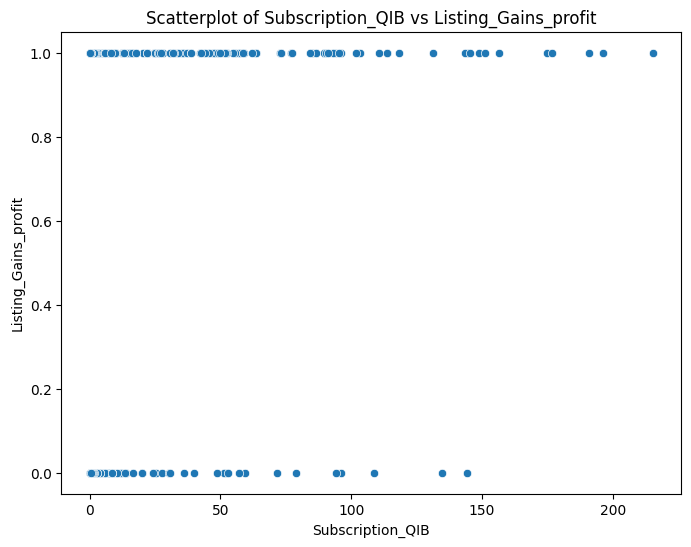

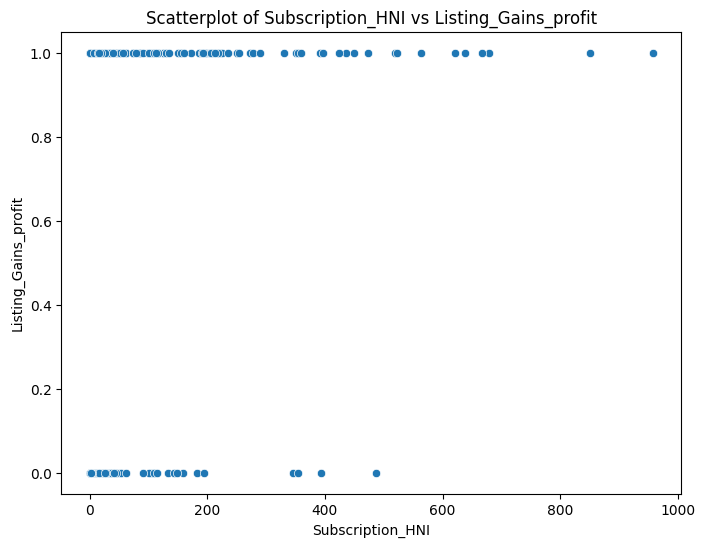

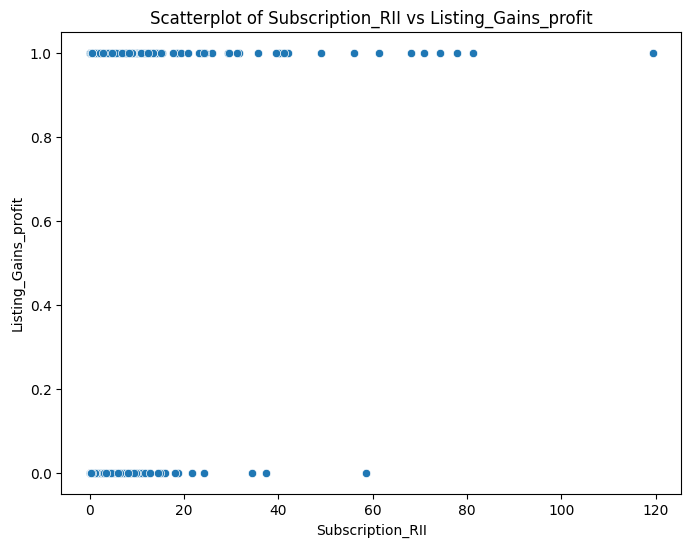

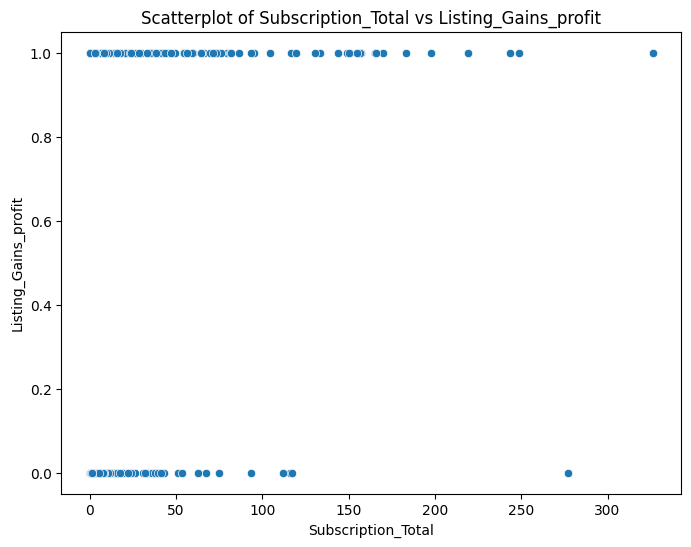

In [13]:
predictors = ['Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total']
target = 'Listing_Gains_profit'

for predictor in predictors:
  plt.figure(figsize=(8,6))
  sns.scatterplot(x=predictor, y=target, data=data)
  plt.title(f'Scatterplot of {predictor} vs {target}')
  plt.show()

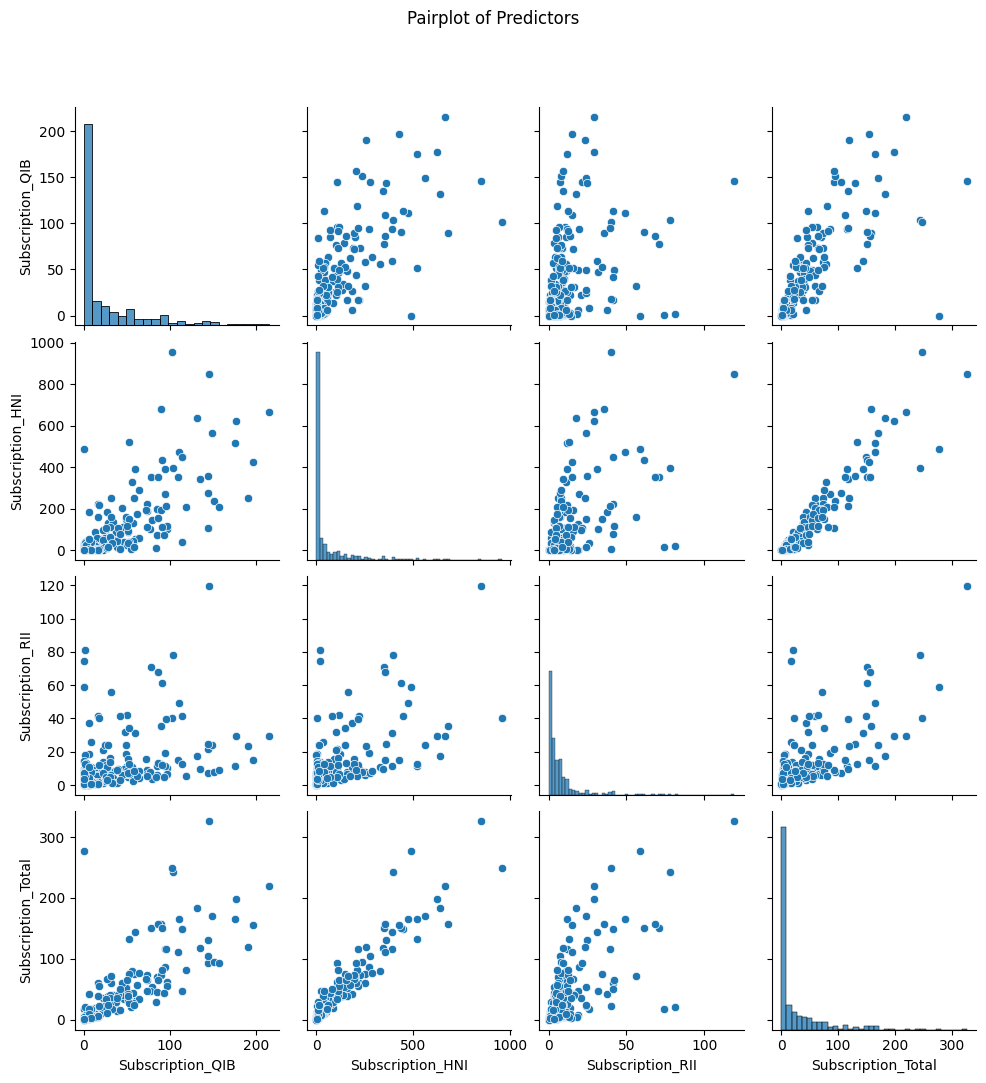

In [14]:
predictor_data = data[predictors]

g = sns.pairplot(predictor_data)  # Assign the pairplot to a variable 'g'
g.fig.suptitle('Pairplot of Predictors', y=1.08)
plt.show()

We can see a strong postive linear correlation between the predictors this could pose some problems for our neural network model.
Potential Implications:
The paoirplot indicates high multicollinearity between the predictors, this can be problematic in some machine learning models. This can make it harder for the model to single out the predictor's effects independantly on the model.This also points to redunancy. The high correlation might suggest that some of these predictors are redundant and may not provide additional information for predicting the target variable. We might have to use regularization techniques like LASSO and Ridge regression to to add penalties in the machine learning model or PCA to reduce the dimensionalty of the model. The scatterplot does not show much or any substantial relationship between the predictors and target variables. The boxplot however shows outliers in the data. Surprisingly the boxplot shows outliers in the last qauter or 3rd quater of the data. There seem to be no outliers in the bottom quater of the data. Let's remove these outliers to help with the machine learning model.

In [15]:
from scipy.stats.mstats import winsorize

predictors = ['Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total']
limits = [0, 0.2]

# let's check for outliers again using IQR method

Q1 = data[predictors].quantile(0.25)
Q3 = data[predictors].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for predictor in predictors:
    data[predictor] = winsorize(data[predictor], limits=limits)
    outliers = data[((data[predictors] < lower_bound) | (data[predictors] > upper_bound)).any(axis=1)]
    print(f"Number of outliers in {predictor}: {len(outliers)}")

Number of outliers in Subscription_QIB: 62
Number of outliers in Subscription_HNI: 46
Number of outliers in Subscription_RII: 31
Number of outliers in Subscription_Total: 0


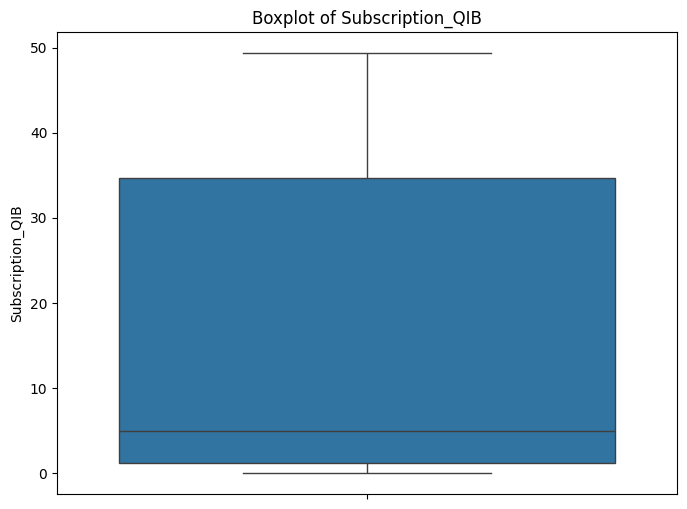

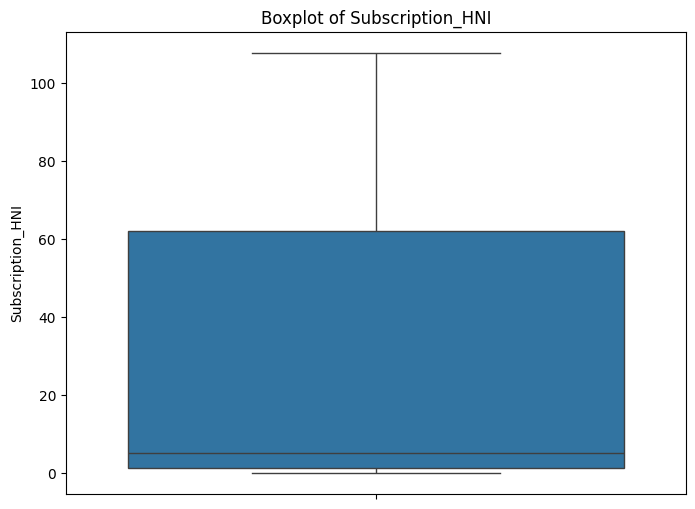

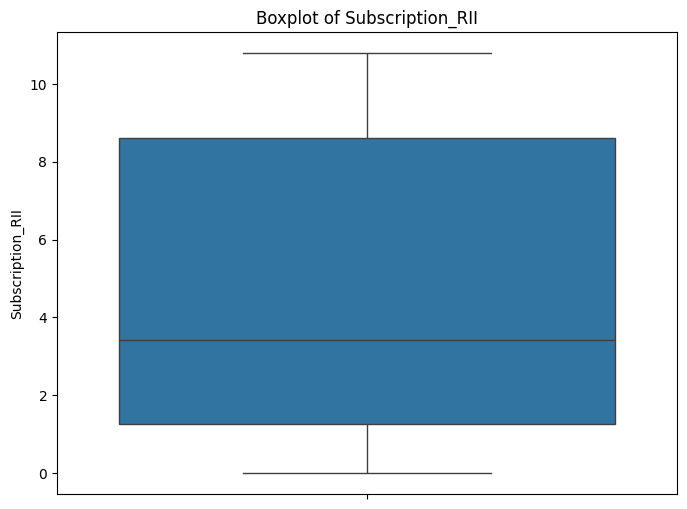

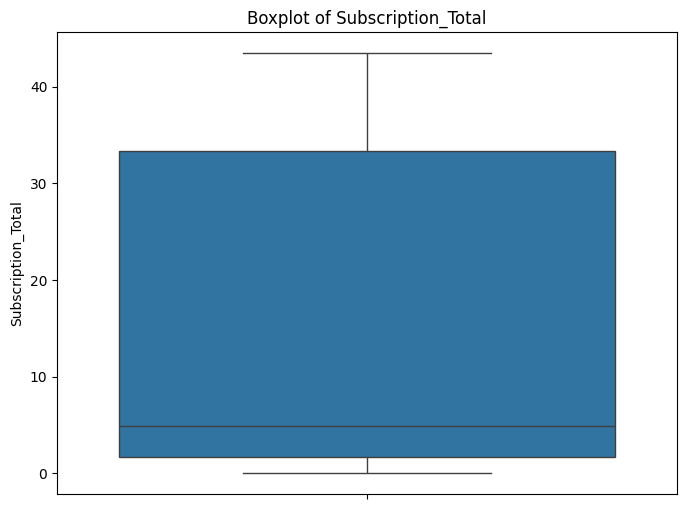

In [16]:
for predictor in predictors:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=data[predictor])
  plt.title(f'Boxplot of {predictor}')
  plt.show()

Looks good we have removed the outliers from the predictor variables as much as we can without signficanlty altering the data. I set a 0 limit for removing the outliers because all the outliers were in the upper limit. There are a lot of outliers still remaining in subscription_QIB (19% of data) which I will leave because bringing the down to 0 will the model accuracy worst. The subcription_HNI and RII also have 46 and 31 outliers respectively representing about 14% and about 10% of the data each. We will leave this as is because this can drastically alter the outcome.

In [17]:
target_variable = data['Listing_Gains_profit']
predictor_variables = data[predictors]

scaler = MinMaxScaler()
predictor_variables = scaler.fit_transform(predictor_variables)
predictor_variables = pd.DataFrame(predictor_variables, columns=predictors)

print(predictor_variables.describe())

       Subscription_QIB  Subscription_HNI  Subscription_RII  \
count        319.000000        319.000000        319.000000   
mean           0.335564          0.303661          0.449391   
std            0.397361          0.401352          0.365963   
min            0.000000          0.000000          0.000000   
25%            0.023308          0.011649          0.118165   
50%            0.100122          0.047062          0.316960   
75%            0.701966          0.576395          0.797498   
max            1.000000          1.000000          1.000000   

       Subscription_Total  
count          319.000000  
mean             0.349231  
std              0.394641  
min              0.000000  
25%              0.037833  
50%              0.113385  
75%              0.768054  
max              1.000000  


In [18]:
new_data = pd.concat([predictor_variables, target_variable], axis=1)
new_data.head()

,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Listing_Gains_profit
0,0.981759,0.984127,1.000000,0.994020,1
1,1.000000,0.482224,0.351251,0.715501,0
2,0.020065,0.154089,0.579240,0.118905,1
3,0.022700,0.033881,0.057461,0.028059,0
4,0.010539,0.014109,0.209453,0.025759,0


In [19]:
new_data['Listing_Gains_profit'].value_counts(normalize=True)

,proportion
Listing_Gains_profit,
1,0.545455
0,0.454545


Let's split the data into train and test splits.

In [20]:
X = new_data.drop('Listing_Gains_profit', axis=1)
y = new_data['Listing_Gains_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 4)
(64, 4)
(255,)
(64,)


Looks good! Now we are ready to build our deep learning model in Keras.

In [21]:
input_shape = (X_train.shape[1],)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),  # Add the Input layer here
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,105 (12.13 KB)

 Trainable params: 3,105 (12.13 KB)

 Non-trainable params: 0 (0.00 B)

None


Let's fit the model on the training data.

In [22]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4493 - loss: 0.6930 - val_accuracy: 0.5686 - val_loss: 0.6861
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5657 - loss: 0.6787 - val_accuracy: 0.5686 - val_loss: 0.6694
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5818 - loss: 0.6625 - val_accuracy: 0.5686 - val_loss: 0.6559
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5956 - loss: 0.6498 - val_accuracy: 0.5686 - val_loss: 0.6462
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6014 - loss: 0.6261 - val_accuracy: 0.5686 - val_loss: 0.6418
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4935 - loss: 0.6833 - val_accuracy: 0.5686 - val_loss: 0.6393
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5616 - loss: 0.6524 - val_accuracy: 0.5686 - val_loss: 0.6350
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5604 - loss: 0.6310 - val_accuracy: 0.5686 - val_loss: 0.6320
Epo

Let's evaluate the model's accuracy and see how well it performed !

In [23]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5905 
[0.5998823642730713, 0.6980392336845398]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7708 - loss: 0.5553 
[0.5682846307754517, 0.75]


Looking at the results we see that the test set performed slightly better than the training set. It achieved a loss of 0.59 compared to the loss on the training set standing at ~0.62. The accuracy also increased slightly standing at about 75% for test set compared to ~70% for the training set. I want to increase the accuracy and decrease the loss. Let's try and see how can we structure model differently to achieve an accuracy for greater than 85%. Perhaps we could add regularization in the model, like L1 or L2 to reduce the effect multicollinearity which we got hint of earlier. I will use elastic regularization which uses both LASSO (L1) and Ridge (L2) to add penalties to the loss function.

In [26]:
from tensorflow.keras import regularizers

def create_model(l1_reg=0.0, l2_reg=0.0):
    model = keras.Sequential([
        keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        layers.Dense( 32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'l1_strength': [0.0, 0.001, 0.01, 0.1, 1.0],
    'l2_strength': [0.0, 0.001, 0.01, 0.1, 1.0]
}

best_accuracy = 0
best_params = {}

for l1_reg in param_grid['l1_strength']:
    for l2_reg in param_grid['l2_strength']:
        model = create_model(l1_reg, l2_reg)
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        _, accuracy = model.evaluate(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'l1_strength': l1_reg, 'l2_strength': l2_reg}

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7604 - loss: 0.5902 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7604 - loss: 0.5730 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7396 - loss: 0.6620 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 0.9564 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 3.3791 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7083 - loss: 0.6404 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.6400 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6979 - loss: 0.7196 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 0.9907 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 3.4231 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4896 - loss: 0.7636
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4896 - loss: 0.7607 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 0.8119 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 

Using the for loop we got the best accuracy score for both L1 and L2 at around 77%. With strengths at 0.001 for both L1 and L2. I will use LASSO (L1) in the model with strength of 0.001 and see how well it performs in the test set.

In [28]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)),
        layers.Dense( 32, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)),
        layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)),
        layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)),
        layers.Dense(1, activation='sigmoid')
    ])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5529 - loss: 1.1202 - val_accuracy: 0.5686 - val_loss: 1.1018
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6063 - loss: 1.0952 - val_accuracy: 0.5686 - val_loss: 1.0816
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5140 - loss: 1.0814 - val_accuracy: 0.5686 - val_loss: 1.0614
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5670 - loss: 1.0566 - val_accuracy: 0.5686 - val_loss: 1.0406
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5523 - loss: 1.0372 - val_accuracy: 0.5686 - val_loss: 1.0191
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5496 - loss: 1.0166 - val_accuracy: 0.5686 - val_loss: 0.9979
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5564 - loss: 0.9964 - val_accuracy: 0.5686 - val_loss: 0.9773
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5777 - loss: 0.9661 - val_accuracy: 0.5686 - val_loss: 0.9568
Epo

Looks like we got higher accuracy score with L1 regularization! Standing at 78% almost near 80%. As a last step I going to experiment with different metrics to see which one gives the best result.

In [29]:
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[metric])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Test {metric}: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.6022 
Test accuracy: 0.765625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5930 - precision: 0.8791
Test precision: 0.8571428656578064
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5915 - recall: 0.6353 
Test recall: 0.6000000238418579
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6568 - loss: 0.5866
Test f1_score: 0.6382977962493896


# Conclusion

Looking at the all metrics precision gave us the highest score standing at 85%, followed by accuracy at around ~77%, recall at 60% and f1_score at 64%. Looking back we saw that LASSO regularization did up the accuracy a bit since the we did see some multicollinearity so regulariation was worth a try. There was about 5%-8% difference in the results.

Another way we can improve our accuracy score is maybe if we use functional APIs rather than Sequential APIs. These might the model better flexability and improve the metric reuslt. Although we did see precision score cross the 80% mark. We can also optimize the model with a another loss function to see how well the model performs then. Although I would say LASSO regularization in the model with deep forward learning worked overall pretty well. The precision score was around 85% which is good for investors looking to invest in the IPO market since this indicated fewer false positives. However, further investigation is warranted to potentially improve recall without significantly sacrificing precision. Future work could explore alternative model architectures, such as implementing a functional API with dropout layers to enhance flexibility, or experimenting with different loss functions, like focal loss, to address potential class imbalances. Even feature engineering or using issue_price (which I dropped out) in the features might improve the result. Ultimately, the model provides a promising foundation for predicting IPO listing gains, but continued refinement is essential to achieve even higher accuracy and a more robust predictive capability.